# Classification - Introduction and why not use Linear Regression, Using Logisitic Regression for classification models

<img src='Data/1.PNG'>

There are a number of classification models. They are 
1. Linear Classifiers: 
    - Logistic regression, 
    - Decision Trees, 
    - Random Forest
2. Naive Bayes
3. K-Nearest Neighbours (KNNs)
4. Support Vector Machines (SVMs)
5. Neural Networks: Perceptron, Multilayer perceptron, DNNs, CNNs, RNNs, etc

Here, we are going to start classification, and try to use **Linear Regression** first to predict **categorical** values (spam/ham). Then use a actual classification model called as **Logistic Regression** to predict.

## Imports

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import sklearn
from sklearn import cross_validation, metrics, model_selection
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, cross_val_predict

# Ridge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)

## Dataset

- Data set = GLass dataset from UCI

In [6]:
data = pd.read_csv('Data\data1_glass data.csv')
data = data.sort_values(by=['al'])
data.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


# Using Linear Regression, Logistic Regression -- 

.

## Part 1: Predicting a _Continuous_ Response

- Continous Response : Continus datapoints, cluster of points
- Ideal Model fitted automatically by SEABORN
- Created a scatter plot with al on the x-axis and ri on the y-axis, and draw the line of best fit.

#### Feature & Target Variables

In [86]:
X = data[['al']] # Dataframe
Y = data.ri      # Series

#### Visualize the model

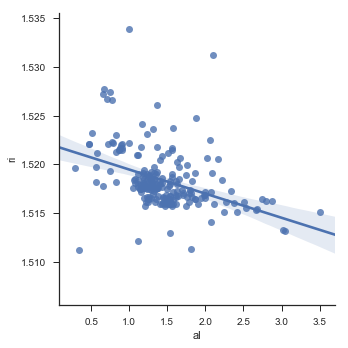

In [87]:
sns.lmplot(x='al', y='ri', data=data)

    This is the ideal Best fit line we have to find using different models...

#### Generic Plot between X and Y

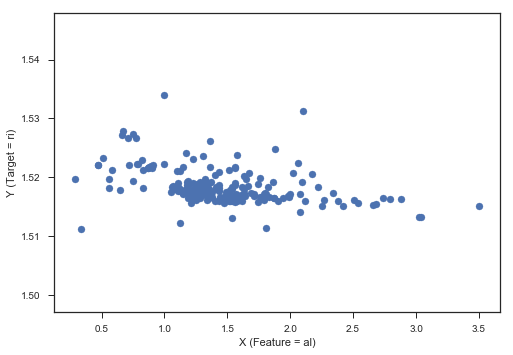

In [88]:
plt.scatter(X, Y)
plt.xlabel('X (Feature = al)')
plt.ylabel('Y (Target = ri)')

    - This is continous response

#### Using Linear Regression for Continous

In [89]:
lm = LinearRegression()
lm.fit(X, Y)

Y_hat = lm.predict(X)
metrics.r2_score(Y, Y_hat)*100

data['ri_Predicted'] = Y_hat
data.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_Predicted
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


#### Linear Regression Model Best Fit Line (BFL) Plot

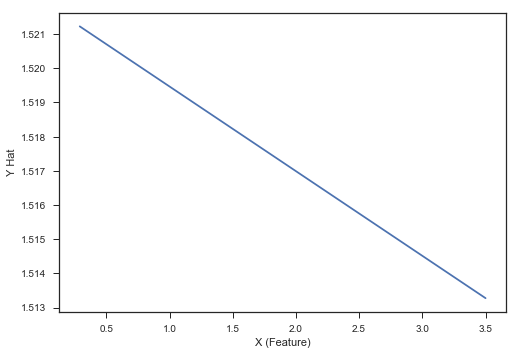

In [90]:
# As, "Y_hat = B0 + B1X" ... i.e Y_hat vs X will be a straight line. This line will be the Best fit line for the model

plt.plot(X, Y_hat)
plt.xlabel('X (Feature)')
plt.ylabel('Y Hat')

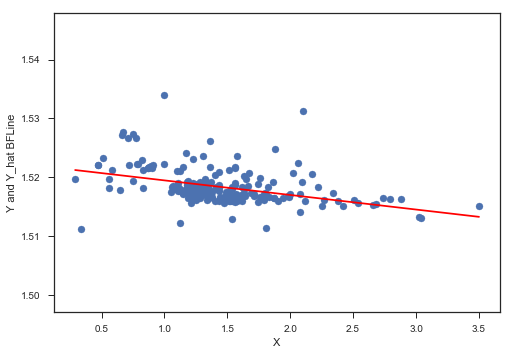

In [91]:
# Combined: Linear Regression Model applied on dataset, found the linear best fit line..
plt.scatter(X, Y)
plt.plot(X, Y_hat, c= 'red')
plt.xlabel('X')
plt.ylabel('Y and Y_hat BFLine')

.

## Part 2 : Predicting a _Categorical_ Response

- Categorical Response: Mapped Values like glass_type (1,2,3,5,6,7) shall be mapped according to some rule to binary/tertiary categories

  `For e.g. 
   Glass type (1,2,3) = Soft Glass = Category 0
   Glass type (5,6,7) = Hard Glass = Category 1
   Hence, Y (Target) = 0 or 1`


- Try using Linear regression and lets see.
- Use Logisitc Regression

In [107]:
# Examine the Values to be mapped -
data = data.drop(['ri_Predicted'], axis=1)
data.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [108]:
# Glass type 1,2,3 - Soft Glass(0)
# Glass type 4,5,6 - Hard Glass(1)
# Here 0 & 1 are categories representing 'Soft' & 'Hard' Glass

data['Glass = Hard'] = data.glass_type.map({1:0,2:0,3:0,5:1,6:1,7:1})
data.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,Glass = Hard,Glass=Hard Predicted
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,0
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,0


#### Feature & Target Variables

In [109]:
# Feature(X) = al and Target(Y) = Glass=Hard

X = data[['al']]
Y = data['Glass = Hard']

#### Generic Plot between X and Y

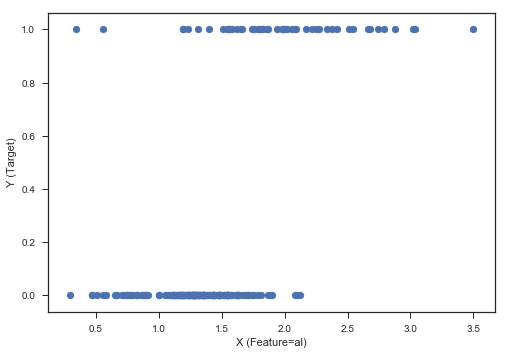

In [110]:
plt.scatter(X,Y)
plt.xlabel('X (Feature=al)')
plt.ylabel('Y (Target)')

    - This is a categorical response

### I. Using Linear Regression for Categorical Responses

In [111]:
lm = LinearRegression()
lm.fit(X,Y)
Y_hat = lm.predict(X)
metrics.r2_score(Y, Y_hat)*100

34.331136959396183

#### Plot of Best fit line for the model using Linear Regression

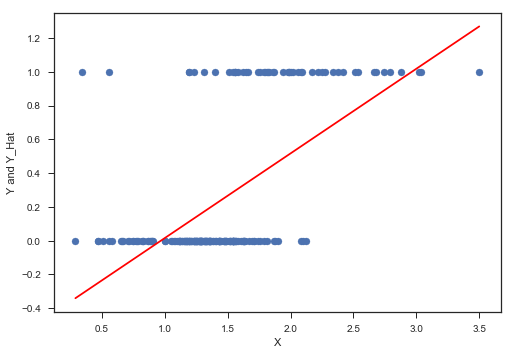

In [112]:
plt.scatter(X,Y)
plt.plot(X,Y_hat,c='red')
plt.xlabel('X')
plt.ylabel('Y and Y_Hat')

    - As you can see, since the response is Categorical, there cannot be a line to predict it. 
    - Also, the probabilty of prediction is going below 0 (till -0.4) and above 1 (till 1.2)
    - What will be the probability at X = 1.5 ?? 0 or 1 ? Though we can define a rule that p(x) > 50% = 1 else 0
    - But we will be missing the essence of the problem.
    - Hence, **Linear Regression cannot be used for Categorical Responses**

### II. Using Logisitic Regression instead for Categorical Responses

<img src='Data/2.PNG'>

- Logisitc Regression outputs the **probabilities of a specific class**. 
- Like here, it will give probability of class 0 or class 1.
- It takes on a "S" shape
- Output Probabilites are **between 0 and 1** as LR function has denominator bigger than numerator (e/1+e)

In [116]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e9)
lr.fit(X, Y)
Y_hat = lr.predict(X)

data['Glass=Hard Predicted'] = Y_hat
data.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,Glass = Hard,Glass=Hard Predicted
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,0
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,0


#### Plot between datapoints and Y_Hat predictions

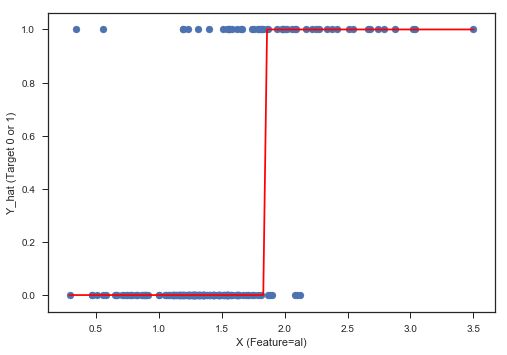

In [136]:
# Plot of datapoints: X vs Y
plt.scatter(X, Y)

# Plot of datapoints: X vs Y_hat, As Y_hat = Log[p(x)/1-(p(x))], so a step function
plt.plot(X,Y_hat, c='red')
plt.xlabel('X (Feature=al)')
plt.ylabel('Y_hat (Target 0 or 1)')

#### Plot between datapoints and Y_Hat Probability predictions

In [157]:
# Prediciting Probabilites of outcomes
Y_hat_prob = lr.predict_proba(X)
Y_hat_prob[0:3]

array([[ 0.99850072,  0.00149928],
       [ 0.99815282,  0.00184718],
       [ 0.9968235 ,  0.0031765 ]])

    - 0.9985 is Probablity of first class 0 and 0.0014 is Probablity of second class 1
    - 0.9981 is Probablity of first class 0 and 0.0018 is Probablity of second class 1
    - 0.9968 is Probablity of first class 0 and 0.0031 is Probablity of second class 1
    
    - Y_hat_prob[:,0]   -> 0 indicates first column,  i.e. Prob of 0
    - Y_hat_prob[:,1]   -> 1 indicates second column, i.e. Prob of 1

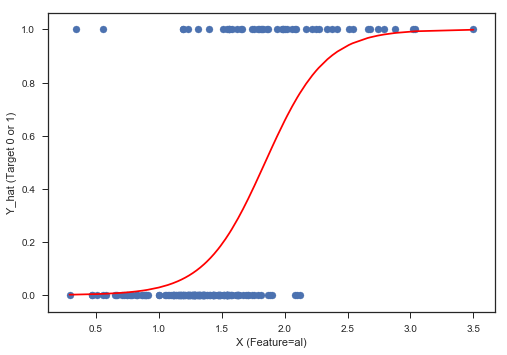

In [158]:
# Picking any probablity, for example, here Prob of 1's -
Y_hat_prob = Y_hat_prob[:,1]

plt.scatter(X, Y)
plt.plot(X, Y_hat_prob, c='Red')
plt.xlabel('X (Feature=al)')
plt.ylabel('Y_hat (Target 0 or 1)')

In [159]:
metrics.r2_score(Y, Y_hat_prob)*100

45.376247754993962

### Comparison of Logisitc Regression over others

<img src='Data/8.PNG'>